# Deep Learning Homework 2

Visit the site https://pytorch.org/vision/0.16/datasets.html to understand how the datasets in pytorch works

In [1]:
import torch
import numpy as np
import matplotlib.pyplot as plt

import torchvision
import torchvision.datasets as datasets
import torchvision.transforms as transforms

import torch.nn as nn
import torch.nn.functional as F

## Data Processing

In [2]:
# the whole point of pytorch is to be able to easily train models on GPU's and TPU's
# if you have a dedicated GPU, you can download CUDA from Nvidia toolkits
# this snippet of code will check if you have cuda installed, and will set the 'device' accordingly
# for now, it should probably return "Running on CPU"

if torch.cuda.is_available():
    device = torch.device('cuda:0')
    print('Running on GPU')
    print(torch.cuda.get_device_name(0))
else:
    device = torch.device('cpu')
    print('Running on CPU')

Running on GPU
NVIDIA GeForce GTX 1060 6GB


We will use the CIFAR dataset
- Classification (10 clases)
- 60 k Images (50k training, 10k testing)
- RGB
- 32x32


In [18]:
train_dataset = datasets.CIFAR10(root='./cifar10',transform=torchvision.transforms.ToTensor(), train=True, download=False) #this is the training dataset
test_dataset = datasets.CIFAR10(root='./cifar10', transform=torchvision.transforms.ToTensor(), train=False, download=False) #this is the dataset test

#the root will create a directory in the actual directory with the name "cifar10" and there  the data will be saved

#Transform rescale and put them in a nice way

The torchvision.transforms.ToTensor() function is a transform function in PyTorch’s torchvision library.

 It converts a PIL Image or a numpy.ndarray (H x W x C) in the range $[0, 255]$ to a torch.FloatTensor of shape (C x H x W) in the range $[0.0, 1.0]$.

In [42]:
test_dataset

Dataset CIFAR10
    Number of datapoints: 10000
    Root location: ./cifar10
    Split: Test
    StandardTransform
Transform: ToTensor()

The above objects ("train/test_dataset") is RAW data

Then a Loader will transform the RAW data into 128 batches that are gonna be iterable

### DataLoader

The torch.utils.data.DataLoader is a crucial component in PyTorch, providing several features that are extremely beneficial when working with datasets:

- Batching the Data: DataLoader allows automatic batching of the data. You can specify the batch_size when creating a DataLoader instance, and it will automatically provide data in batches during the training or testing of the model.

- Shuffling the Data: DataLoader provides an easy option to shuffle the data, which is essential for training models in most machine learning algorithms. Shuffling the data ensures that the model gets a mix of all different classes and doesn’t overfit to the order of the training data.

- Parallelizing the Data Loading: DataLoader supports multi-process data loading. It leverages the num_workers argument to load data in parallel using multiple subprocesses13. This is particularly useful when dealing with large datasets, as it can significantly speed up the data loading process.

- Handling Different Types of Datasets: DataLoader supports both map-style and iterable-style datasets1. Map-style datasets implement the __getitem__() and __len__() protocols and represent a map from indices/keys to data samples. Iterable-style datasets implement the __iter__() protocol and represent an iterable over data samples.

- Customizing Data Loading Order: DataLoader allows you to specify a custom sampler object that yields the next index/key to fetch1. This is useful when you want to customize the sequence of indices used in data loading

In [19]:
# TODO: create training and testing loaders
# Hint: you'll want to read the documentation for torch.utils.data
# experiment with batch sizes, other hyperparams
# 10 minutes 

#the Loaders offers a solution for parallelizing the data with automatic batching

train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=128, shuffle=True) #shuffle just mix the data 
test_loader = torch.utils.data.DataLoader(test_dataset, batch_size=128, shuffle=True) #shuffle just mix the data

A **DataLoader in PyTorch is essentially an iterator** that provides batches of data. It does this in an optimized way, handling the details of batching, shuffling, and loading data in parallel.

The length of the DataLoader object (obtained using Python’s built-in len() function) indeed gives you the total number of batches, not the total number of data samples. If you divide the total number of data samples by the batch size (rounding up if necessary), you’ll get the length of the DataLoader.

In [37]:
train_loader

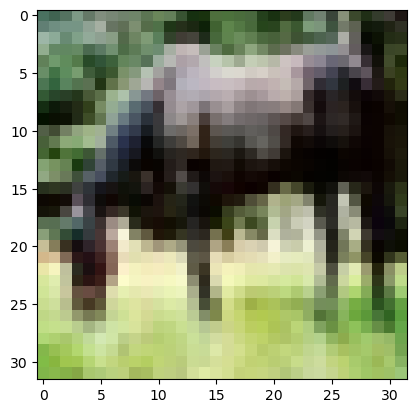

In [27]:
# visualizing a sample from train loader

train_iter = iter(train_loader) #iterate over trainloder

batch_images, batch_labels = next(train_iter)
image, label = batch_images[0], batch_labels[0]
plt.imshow(image.permute(1,2,0))
plt.show()

In [ ]:
train_image_zero, train_class_zero = df_train[0] #this will separate the pattern and the class

In [ ]:
train_image_zero.show() #will show the image

In [ ]:
print(f"The class of the image is: {train_class_zero}")

The class of the image is: 6


In [ ]:
df_train_pattern, df_train_class = df_train #this will separate the pattern and the class

ValueError: too many values to unpack (expected 2)

In [ ]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=4,
                                         shuffle=False, num_workers=2)